In [31]:
import numpy as np
import matplotlib.pyplot as plt

In [32]:
import os
import shutil
import time

In [33]:
dir_save = "../.saves/" + "two close kinks C oscillating height oscillating/" 

# Plot space average of u(t) for all experiments in the folder

In [34]:
N = 10000000
dt = 0.008
tmax = 5000
imax = int(tmax/dt)

Text(0.5, 1.0, 'Crank-Nicolson vary T,dt Cave=0 u0=1 $T/dt = 10$')

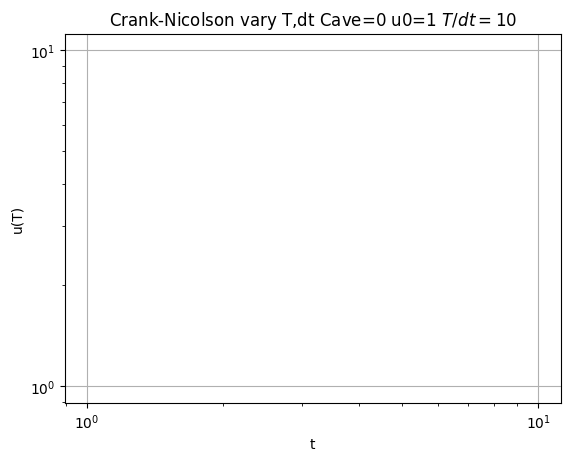

In [35]:
# Create plot object
fig, ax = plt.subplots()
ax.set_xscale("log")
ax.set_xlabel("t")
ax.set_ylabel("u(T)")
ax.set_yscale("log")
ax.grid()
ax.set_title("Crank-Nicolson vary T,dt Cave=0 u0=1 $T/dt = 10$")

../.saves/two close kinks C oscillating height oscillating/1708937467727
../.saves/two close kinks C oscillating height oscillating/1708937466174
../.saves/two close kinks C oscillating height oscillating/1708937464606
../.saves/two close kinks C oscillating height oscillating/1708937463040
../.saves/two close kinks C oscillating height oscillating/1708937461751
../.saves/two close kinks C oscillating height oscillating/1708937460549
../.saves/two close kinks C oscillating height oscillating/1708937459348
../.saves/two close kinks C oscillating height oscillating/1708937458121
../.saves/two close kinks C oscillating height oscillating/1708937456555
../.saves/two close kinks C oscillating height oscillating/1708937449033


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


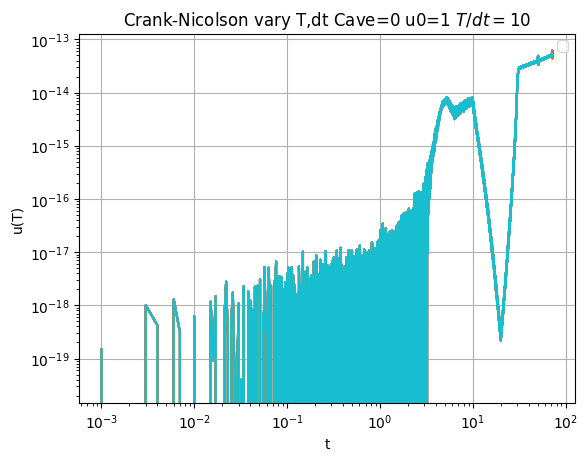

In [36]:
# Get all the simulations in the selected folder
for folder in sorted(os.listdir(dir_save), reverse=True):
    dir = dir_save + folder
    print(dir)
    # Get label of the curve
    f = open(dir + "/label.dat", "r")
    label = f.readline().strip('\n')
    f.close()

    f = open(dir + "/fileAveout.dat", "r")
    x = np.zeros(N)
    y = np.zeros(N)
    i = 0
    for row in f:
        a, b = row.split(" ")
        x[i] = float(a)
        y[i] = float(b)
        i = i + 1
        if i > imax:
            break
    ax.plot(x[0:min(i,imax)], y[0:min(i,imax)],label=label)
ax.legend()
fig

# Plot the final state u(x,tmax) for any experiment in the folder

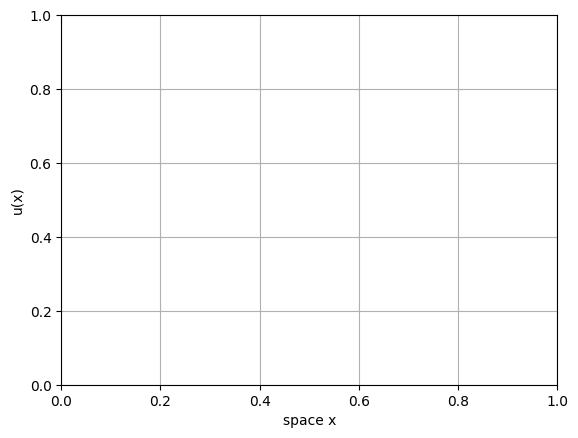

In [37]:
# Create plot object
fig, ax = plt.subplots()
ax.set_xscale("linear")
ax.set_xlabel("space x")
ax.set_ylabel("u(x)")
ax.set_yscale("linear")
ax.grid()

../.saves/two close kinks C oscillating height oscillating/1708937449033
0 1001
../.saves/two close kinks C oscillating height oscillating/1708937456555
0 1001
../.saves/two close kinks C oscillating height oscillating/1708937458121
0 1001
../.saves/two close kinks C oscillating height oscillating/1708937459348
0 1001
../.saves/two close kinks C oscillating height oscillating/1708937460549
0 1001
../.saves/two close kinks C oscillating height oscillating/1708937461751
0 1001
../.saves/two close kinks C oscillating height oscillating/1708937463040
0 1001
../.saves/two close kinks C oscillating height oscillating/1708937464606
0 1001
../.saves/two close kinks C oscillating height oscillating/1708937466174
0 1001
../.saves/two close kinks C oscillating height oscillating/1708937467727
0 1001


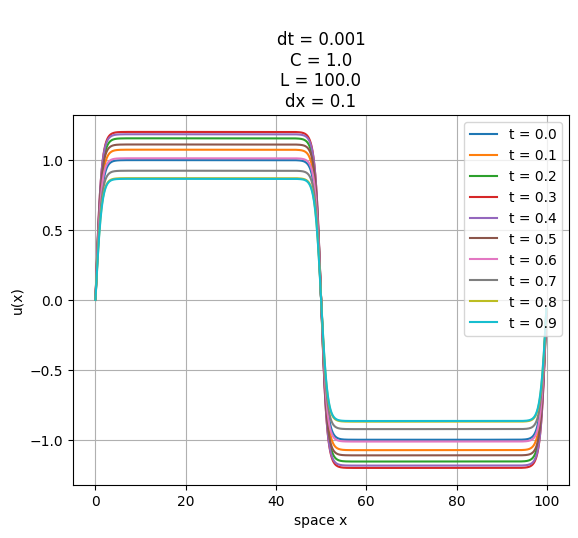

In [38]:
# Get all the simulations in the selected folder
xmin = -1
xmax = -1

for folder in sorted(os.listdir(dir_save), reverse=False):
    dir = dir_save + folder
    print(dir)

    f = open(dir + "/tdgl_result.dat", "r")
    N = 1000000000
    x = np.zeros(N)
    y = np.zeros(N)
    i = 0
    for row in f:
        if i != 0:
            a, b = row.split(" ")
            x[i-1] = float(a)
            y[i-1] = float(b)
        else:
            N, tmax, dx, dt, seed, A, Thalf, Cave = row.split(" ")
            N = int(N)
            tmax = float(tmax)
            dx = float(dx)
            L = N*dx
            dt = float(dt)
            A = float(A)
            T = 2*float(Thalf)
            Cave = float(Cave)
        i = i + 1

    f.close()
    
    # Get label of the curve
    f = open(dir + "/label.dat", "r")
    label = f.readline().strip('\n')
    # Custom label
    labell = label
    # Label with the state's time
    state_time = tmax - 71.1
    state_time = round(state_time, 3)
    labell = "t = " + str(state_time) # Label with time (uncomment for custom label)
    f.close()
    imin = int(xmin/dx)
    imax = int(xmax/dx)
    if xmin < 0:
        imin = 0
    if xmax > L or xmax < 0:
        imax = i
    print(imin, imax)
    ax.plot(x[imin:imax-1], y[imin:imax-1], label = labell)
    
#eps = 0.5
#plt.ylim(-1-eps,1+eps)

label = ""
#u0 = 1
#label = label + "$u_0 = " + str(u0) + "$"
label= label + "\ndt = " + str(dt)
if T > 0:
    label = label + "\nC(t) = " + str(Cave) + " + " + str(A) + "$\sin{2\pi t/" + str(T) + "}$"
else:
    label = label + "\nC = " + str(Cave)
label = label + "\nL = " + str(round(N*dx,3))
label = label + "\ndx = " + str(round(dx,3))
#label = "dt = " + str(dt) 
#if float(T) > 0:
#label = label + "; T = " + str(T) + "; A = " + str(A)
#else:
#label = label + "; C = " + str(A) + " cost"

ax.set_title(label)
ax.set_xlabel("space x")
ax.set_ylabel("u(x)")



ax.legend()
fig

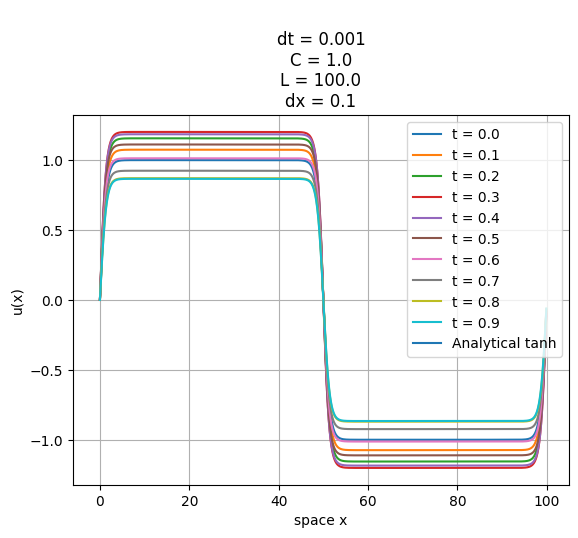

In [39]:
# Plot analytical solution
Num = 1000
x = np.arange(0,Num)/Num*(xmax-xmin)+xmin*np.ones(Num)
y = np.zeros(Num)
j = 0
xc = 50 # tanh center
for xi in x:
    y[j] = -np.tanh(x[j]-xc)
    j = j + 1
ax.plot(x,y,label="Analytical tanh")
ax.legend()
fig

In [40]:
np.tanh()

TypeError: tanh() takes from 1 to 2 positional arguments but 0 were given